In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s
from pycausal.pycausal import pycausal as pc
from collections import defaultdict
from numpy.polynomial.polynomial import polyfit  
from scipy.stats import pearsonr
from pylab import text
from pycausal import prior as p
import itertools

# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))
    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    x = keras.layers.Dropout(dropouts[0])(x, training=False)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        x = keras.layers.Dropout(drop)(x, training=False)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model

def get_bic(df, prior, penalty = 2):

    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True, penalty = 200
               )
    
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    return BIC #/ len(df)
def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))
def make_categorical(df, complete_df, categoricals):   
    retval = None
    for key in df.columns:
        if retval is not None:
            if key in categoricals:
                retval = np.concatenate((retval, to_categorical(df[key], len(complete_df[key].unique()))), axis = 1)
            else:
                retval = np.concatenate((retval, df[key].values[...,np.newaxis]), axis = 1)
        else:
            if key in categoricals:
                retval = to_categorical(df[key], len(complete_df[key].unique()))
            else:
                retval = df[key]
    return retval
num_models = 100    
pc = pc()
pc.start_vm(java_max_heap_size = '21000M')
tetrad = s.tetradrunner()

models = []
model_names = []



randomize = False
if randomize:
    layers = [256, 512, 1024, 2048, 4096]
    for i in range(num_models):
        network = []
        for j in range(3):
            network.append(layers[random.randint(0,len(layers) -1)])
        models.append(network)
        model_names.append('temp/sima' + str(i))
    print(models, model_names)    
else:
    model_layers = [512, 256]
    for i in range(num_models):
        models.append(model_layers)
        model_names.append('temp/sima' + str(i))

print(models, model_names)

/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [51

In [2]:
import networkx as nx

def random_dag(nodes, edges):
    """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(i)
    while edges > 0:
        a = random.randint(0,nodes-1)
        b=a
        while b==a:
            b = random.randint(0,nodes-1)
        G.add_edge(a,b)
        if nx.is_directed_acyclic_graph(G):
            edges -= 1
        else:
            # we closed a loop!
            G.remove_edge(a,b)
    return G



In [3]:
import pydot
from IPython.display import SVG

def examine_graph_continuous(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
               )
    return tetrad.getTetradGraph()

def gen_data(list_vertex = [], list_edges = [], mean = 0, var = 1, SIZE = 20000):
    g = []
    for v in list_vertex:
        g.append(np.random.normal(mean,var,SIZE))
        
    for edge in list_edges:
        g[edge[1]] += g[edge[0]]
    g = np.swapaxes(g,0,1)
    return pd.DataFrame(g, columns = list(map(str, list_vertex)))



In [5]:
bestMSE = []
bestBIC = []
bestCOMBO = []
averageDegree = []
targetDegree = []
target_inD = []
target_outD = []
descendants = []
t= 0
while (t < 100):
    train_size = 40000
    nodes = 3
    test_mean = 1
    test_var = 2
    test_size = 4000
    
    G = random_dag(nodes, random.randint(nodes, nodes*nodes)) # since max number of edges is n^2
    df = gen_data(np.arange(nodes), G.edges, SIZE = train_size)
    require = []
    for i in G.edges:
        require.append([str(i[0]), str(i[1])])  
    prior = p.knowledge(requiredirect = require)
    examine_graph_continuous(df, prior)
    
    # Check to make sure that graph matches our prior knowledge. Or else abort this test.
    a = set()
    for i in tetrad.getEdges():
        a.add((i[0], i[-1]))
    b = set()
    for i in require:
        b.add((i[0], i[1]))
    print("A = ", a)
    print("B = ", b)
    if a != b:
        continue
        
    known_conx = set({})
    for i in tetrad.getEdges():
        if ' --> ' in i:
            known_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
    known_conx
        
    # Need to set our inputs and outputs
    inputs = set(np.arange(nodes))
    target = str(a.pop()[random.randint(0,1)])
    inputs.remove(int(target))
    inputs = list(map(str, inputs))
    df_test = gen_data(np.arange(nodes), G.edges, mean = test_mean, var = test_var, SIZE = test_size)
    target = [target]
    
    print("Inputs = ", inputs)
    print("Target = ", target)
    #df.drop(df_test.index, inplace = True)
    #df_test.reset_index(inplace = True)
    #df.sample(frac= 1).reset_index(inplace = True) # this will shuffle and reset index

    x_test = df_test[inputs]
    y_test = df_test[target]

    causal_split = 0.2
    val_split = 0.2
    train_split = 1 - (causal_split + val_split)

    x_causal = df[inputs][-int(causal_split * len(df)) :]
    y_causal = df[target][-int(causal_split * len(df)) :]

    x_val = df[inputs][int(train_split * len(df)):-int(causal_split * len(df))]
    y_val = df[target][int(train_split * len(df)):-int(causal_split * len(df))]

    x_train = df[inputs][:int(train_split * len(df))]
    y_train = df[target][:int(train_split * len(df))]

    verbosity = 0

    for idx, model_name in enumerate(model_names):
        if type(models[idx]) is list:
            #clear session
            keras.backend.clear_session() 
            #get model according to specification
            model = get_model(models[idx], [0.2] * len(models), np.shape(x_train)[1])
            callbacks = [ModelCheckpoint(model_name, verbose= verbosity, monitor='val_loss',save_best_only=True), 
                         EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose= verbosity, mode='auto')]
            model.compile(optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9, ), loss='mean_squared_error', metrics = ['mse'])
            #print(len(X), len(y))
            model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val), callbacks = callbacks, batch_size = 32, verbose = verbosity)
        else:
            models[idx].fit(X,y)





    generalization = []
    metrics = []
    proposed = []
    x_causal.reset_index(drop=True, inplace = True)
    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(x_test)
        generalization.append(mean_absolute_error(y_pred, y_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        
        #causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)



        metrics.append(mean_absolute_error(y_causal_pred, y_causal))
        #print(x_causal.head)
        bic_pred = get_bic(causal_df, prior)
        #print(bic_pred, tetrad.getEdges())

        found_conx = set({})
        for i in tetrad.getEdges():
            if ' --> ' in i:
                found_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
        found_conx

        if found_conx == known_conx:
            proposed.append(bic_pred)
        else:
            print("******Found an error")
            print(bic_pred, tetrad.getEdges())
            # for now just remove bad model.  Will need to add it to distance metric.
            proposed.append(bic_pred)
            #metrics = metrics[:-1]
            #generalization = generalization[:-1]
    nbest = 10
    print(proposed)
    total = normalize(metrics) + normalize(proposed)
    final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    bestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    bestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    bestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    print("Times = ", t)
    d = []
    for i in G.degree():
        d.append(i[1])
        if str(i[0]) in target:
            targetDegree.append(i[1])
    averageDegree.append(np.mean(d))
    target_inD.append(G.in_degree(int(target[0])))
    target_outD.append(G.out_degree(int(target[0])))
    descendants.append(len(nx.descendants(G, int(target[0]))))
    print(targetDegree, averageDegree)
    t += 1
    
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
Inputs =  ['0', '1']
Target =  ['2']
[-18457.797867312547, -18277.27813230242, -18242.37891397529, -18368.925345513293, -18258.780570101648, -18338.121176321507, -18331.310251257342, -18188.204815742374, -18315.093635040812, -18275.288101772356, -18354.94351931953, -18322.931574482525, -18370.76526607021, -18277.385217402592, -18150.416425826985, -18277.117239615516, -18245.86648102242, -18359.848311016987, -18331.0807639276, -18256.057810663387, -18278.74276374579, -18271.84766428896, -18380.01438222191, -18348.32801381643, -18313.990795749593, -18259.53682436483, -18418.995315278444, -18299.003069470382, -18330.17080155137, -18249.645521746417, -18235.258992620973, -18324.003460447107, -18329.2809783319, -18350.812485429382, -18360.99282402063, -18359.967195984445, -18312.87652424358, -18359.917625918137, -18340.67496775783, -18166.41821251667, -18338.594854414503, -18209.193093166083, -18452.18503323

A =  {('0', '2'), ('1', '0'), ('1', '2')}
B =  {('0', '2'), ('1', '0'), ('1', '2')}
Inputs =  ['1', '2']
Target =  ['0']
[-12220.124878477087, -12176.493728141113, -12104.576454621098, -11934.015584355699, -12059.83982293697, -12024.206871186696, -11946.725203382703, -12151.994032695246, -12170.251233196963, -12072.943647302232, -12060.282448144486, -12166.170214630196, -12072.913989776931, -11982.848784759623, -12164.6311843358, -11994.500202530751, -11994.22062720166, -12046.613370107574, -12128.890205007905, -12069.877898890127, -12204.652261710367, -12197.328515537429, -12095.208903590168, -12043.66818565168, -12117.188719404512, -12122.208427958505, -12193.049706071384, -12037.66766698664, -11991.596522129386, -12028.916613123369, -12067.092430655466, -12031.402430383183, -12306.804877542245, -12040.9743673938, -12182.947910454726, -12165.643164909085, -12070.024332969064, -12110.936179566454, -12084.863631570972, -12174.423213049353, -11986.084253259638, -12084.078350625574, -120

A =  {('2', '0'), ('1', '0'), ('1', '2')}
B =  {('2', '0'), ('1', '2'), ('1', '0')}
Inputs =  ['0', '1']
Target =  ['2']
[-17800.169008270484, -17914.800317469606, -17798.5122439515, -17952.033483552677, -17792.275741685316, -17940.88368958779, -17690.98680929426, -18049.269516972716, -17861.06038717151, -17833.058956993136, -17855.401184570837, -17740.130799942322, -17768.991345429098, -17737.278402499604, -17963.324583992013, -17975.34576015467, -17765.508646768998, -17987.53029423057, -17835.602552899294, -17836.964422949746, -17944.84511219433, -17832.737740293476, -17860.938092957524, -17908.23808856817, -17894.78079955032, -17877.659700354616, -17985.269468823957, -17887.61923683023, -17768.37863230701, -17790.7586507428, -18022.598091414013, -17890.23694619512, -17967.06505345684, -17939.82763113417, -17879.12428149362, -17982.009687774655, -17959.296226302336, -17824.83435096295, -18029.01084938791, -17785.579158267166, -17958.583422643715, -17974.682407391265, -18022.510771596

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '0'), ('2', '1'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-11433.557675306438, -11546.96579507978, -11703.659510665766, -11571.100458523164, -11405.664273720642, -11446.624550317287, -11435.82496750038, -11368.888475135427, -11524.266262798661, -11259.769560408979, -11410.004148558439, -11522.518540100125, -11467.34472540258, -11393.617889307137, -11436.729849031857, -11353.508834039138, -11440.965238247818, -11561.934926588401, -11360.493178019498, -11453.804122785943, -11505.259788500032, -11398.770976472333, -11504.439871702281, -11435.57536372199, -11461.798771427504, -11362.279144408185, -11532.34481051898, -11599.899994370227, -11608.904926850764, -11439.733724255224, -11432.796172838722, -11480.024067202257, -11445.845908169493, -11533.765693963753, -11378.593506225625, -11407.757770414804, -11410.37047778572, -11542.994689864325, -11393.115002834485, -11643.673961590095, -11385.868302436527, -11307.563304756535, -1

******Found an error
-9239.4774568795 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9274.834067292708 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9247.326759791784 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9214.670474846887 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9099.072140243567 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9334.183503448432 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9202.30684153091 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9214.459421311742 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9220.24211336792 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9277.609022656045 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9225.013940504417 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9333.45253742992 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9284.619143800275 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9364.501912532309 ['1

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-18165.67231045322, -18280.831792432044, -18373.363762919536, -18168.10485055823, -18169.935905375605, -18238.46514909745, -18194.49675699457, -18174.826776269794, -18196.386196787644, -18242.853024246346, -18218.242592806055, -18237.192618968016, -18112.71728704639, -18138.656850453248, -18290.795783205143, -18270.404834513552, -18137.19592068126, -18230.606719334057, -18253.726960224743, -18250.07622265822, -18075.007450353398, -18150.755720795663, -18224.827418050107, -18255.960999828265, -18092.963046320216, -18183.836252242618, -18208.715741996508, -18115.439298749785, -18166.813074617243, -18107.994427525402, -18331.664656844616, -18280.577505172965, -18148.580735000196, -18242.5001440652, -18269.88170480521, -18181.345865311996, -18131.413581260967, -18276.509978752205, -18209.87762577687, -18360.13192545443, -18158.430016295773, -18240.88179244863, -18291.58

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-18323.61947810809, -18443.017996291514, -18303.672242022978, -18290.020919609713, -18394.2731585451, -18333.14339347108, -18318.449675074484, -18353.549671159217, -18314.022998144166, -18394.662867788153, -18318.207275735665, -18280.049715927413, -18350.20013289214, -18211.4589619474, -18392.492679588835, -18369.34114739733, -18306.6174285808, -18326.300917455756, -18392.358775041903, -18249.139850595537, -18276.23367082189, -18326.670274049782, -18339.408342082104, -18217.9097109298, -18416.383513846613, -18299.75039026121, -18335.237096259774, -18342.083750027832, -18361.63670932415, -18411.054337047466, -18346.61793244271, -18186.233186032056, -18302.010789772063, -18350.35493777863, -18335.50043205239, -18299.419502013818, -18315.73730640702, -18195.656212875445, -18320.968217876918, -18291.937393272387, -18290.416222312062, -18244.00207706459, -18310.673762939

******Found an error
-9751.983903961172 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9650.486429506727 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9558.685571096707 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9632.916979023557 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9591.79771327995 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9501.040927123748 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9526.944998893767 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9422.126304934613 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9589.679245849664 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9660.461080933059 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9519.425814367674 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9628.953546197408 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9509.064189391032 ['1 --> 0', '2 --> 0', '1 --> 2']
******Found an error
-9562.004288842701

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '0'), ('2', '1'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-8829.523147364627, -8434.972664883782, -8493.820302178341, -8601.236648169572, -8655.162501306539, -8819.037501219691, -8776.769274390677, -8644.468329535852, -8505.627234128853, -8673.172631741196, -8580.969174992028, -8356.194975153274, -8462.683097492461, -8891.131728208347, -8220.90203430019, -8650.720926458547, -8425.336732183358, -8553.773287964545, -8506.819423745621, -8424.77529428318, -8697.371630550737, -8555.220869868486, -8624.611223918237, -8828.694550309227, -8748.358164148769, -8696.19949451182, -8748.16206840658, -8411.670583262052, -8685.740719686986, -8464.903422022635, -8452.87585896409, -8410.636340555307, -8308.141864052548, -8772.246018923835, -8752.828379041537, -8652.534624679822, -8526.085104267124, -8542.541936799693, -8484.549654571449, -8513.362227357295, -8639.613449848785, -8375.029763599136, -8801.026641185397, -8561.968082271236, -82

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-8554.858499728558, -8309.728444417458, -8423.97071852893, -8557.0948931278, -8337.236763609522, -8507.21261375281, -8678.833058930742, -8236.03853680471, -8510.45287055031, -8699.265162680913, -8343.973234267196, -8607.306976854295, -8401.91374491835, -8364.848512958815, -8516.95628983837, -8711.336169166392, -8431.820839071654, -8334.716718919579, -8435.414452655245, -8568.787715293001, -8811.921837198337, -8529.073050393621, -8596.255901280507, -8485.68236164792, -8327.628006513198, -8578.58820296447, -8404.397203866574, -8430.755264922866, -8385.33601851325, -8556.53610087653, -8265.140928265426, -8350.086009820046, -8201.660507125775, -8416.236021219347, -8396.524208995557, -8475.289394724492, -8388.923573716947, -8612.213770551522, -8496.686154805233, -8742.197888103616, -8336.121636797876, -8602.935704564981, -8330.40276810195, -8637.602236808742, -8562.90283

A =  {('0', '2'), ('1', '0'), ('1', '2')}
B =  {('0', '2'), ('1', '0'), ('1', '2')}
Inputs =  ['1', '2']
Target =  ['0']
[-12262.801934490351, -12078.676704354159, -12155.861351530013, -12163.718310726803, -12282.544153262323, -12242.013168106776, -12116.561442461287, -12266.371377328007, -12262.923633825336, -12178.171816248236, -12314.9044448078, -12134.166421377495, -12166.011542411663, -12271.272858479304, -12243.193741254798, -12316.271510408855, -12320.951290261159, -12204.840287176627, -12076.606026181904, -12089.28278844954, -12274.026828468843, -12166.195493926258, -12002.185808982917, -12211.660835771825, -12222.55215679827, -12275.605815474637, -12332.500235187554, -12263.840967366952, -12177.186708759677, -12308.180362746742, -12128.77104716119, -12356.7087948495, -12201.658395604052, -12296.092793427913, -12266.776462287145, -12256.880542926589, -12157.759151594746, -12326.463895791698, -12268.73318399411, -12252.56136103863, -12221.167124820699, -12133.011808356378, -1205

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
Inputs =  ['0', '1']
Target =  ['2']
[-18229.224681177813, -18399.33221319197, -18259.050833865265, -18252.620912845443, -18402.29375262568, -18313.60884245249, -18351.667153374397, -18209.684344900234, -18272.518002478508, -18218.785664890434, -18220.223459375677, -18158.691798795342, -18176.172418733324, -18190.775188800537, -18193.369263318535, -18238.445956535477, -18296.107287975727, -18296.402913660768, -18354.786430721397, -18257.684739108285, -18294.908884568344, -18419.14737643249, -18283.926039797305, -18310.076535498258, -18120.080441523147, -18132.939798812236, -18254.41895080618, -18280.38492829361, -18305.5496013112, -18372.22352345894, -18200.562104405937, -18303.08963709652, -18408.109847393513, -18300.683987215514, -18332.522389270092, -18316.07207024652, -18283.565877456913, -18270.38618155013, -18269.78702708015, -18309.7206813226, -18488.151632003966, -18116.49808337346, -18213.72922

A =  {('2', '1'), ('2', '0'), ('1', '0')}
B =  {('2', '0'), ('2', '1'), ('1', '0')}
Inputs =  ['0', '1']
Target =  ['2']
[-9075.272541410799, -8855.852130865516, -8927.119794536748, -9156.371268195075, -9142.717987469725, -8856.992495906557, -9027.245584472019, -9222.96870855342, -9040.619187438542, -8977.884211631546, -8960.374780011301, -9017.969348968809, -9109.198538049899, -9278.358331059368, -9056.019705730705, -8910.686760974844, -8949.245768147845, -9187.649802203425, -9120.706271887422, -9109.6481056528, -9114.229261296026, -9067.972392555806, -8924.185913491008, -8948.356461567262, -9012.016672609789, -8761.145216693367, -9050.638011015388, -9176.61022518465, -8884.434292815793, -8933.939658904137, -8938.887390991456, -9056.481840686502, -8899.013789265118, -9063.149184474092, -8945.429285460741, -9303.877998140746, -9109.889883058328, -8952.622837587442, -8816.811283559631, -8815.597088082988, -8958.127142543824, -9090.040081980542, -8934.842002420955, -9259.774891504323, -9

A =  {('1', '2'), ('0', '1')}
B =  {('1', '2'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
******Found an error
-5342.25999012825 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5375.409507546921 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5045.851185254564 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5441.43244992714 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5426.116732477239 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5436.626943105163 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5302.874938286753 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5242.12444943802 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5414.248147916611 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5235.121641031476 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5449.632558106704 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-5315.636253894782 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an err

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
Inputs =  ['0', '1']
Target =  ['2']
[-18603.027255110093, -18587.38301862827, -18686.732061464358, -18676.47592543285, -18640.48170558039, -18463.420528531322, -18655.26921343233, -18509.521324507976, -18640.321717826184, -18622.075731762885, -18647.3662017796, -18577.690089841053, -18730.439121503172, -18606.859069162238, -18547.071901709878, -18722.924637437583, -18568.467609115003, -18649.354650398447, -18659.57543581739, -18593.271229563554, -18539.806176939026, -18611.674913939227, -18633.117010077982, -18470.24812675664, -18510.818368653327, -18614.52762050298, -18681.283281036147, -18610.895499177943, -18707.350522935358, -18560.44559309101, -18615.69354155763, -18624.71243507306, -18472.57238549108, -18607.314712698782, -18556.682252026927, -18564.517274614907, -18522.25963915824, -18749.769392988193, -18623.758200370266, -18575.038755423757, -18617.107279756463, -18655.262222914465, -18607.372

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-9038.399962477493, -8631.524092129555, -8673.088861060014, -8714.764205091764, -8564.102956393337, -8938.585266832804, -8670.468825391295, -8833.047408458122, -8608.67160314061, -8660.957661607674, -8677.927137991246, -8695.89527396619, -8717.97854042576, -8625.587344726671, -8911.550777241693, -8677.680022127042, -8666.005846844382, -8381.598788691701, -8668.592519901591, -8726.088281316166, -8899.262720570354, -8844.215421422294, -8673.991354132238, -8774.357986161682, -8916.16053533967, -8736.194678508064, -8730.643838082811, -8768.526375911722, -8670.86533483751, -8773.312377584658, -8640.091572470841, -8631.742876631342, -8756.053529031127, -8951.62719053972, -8929.477421319578, -8936.188440825996, -8616.954778378227, -8626.559082644908, -8671.07952204585, -8691.860808991605, -8567.60419063871, -8624.046145421922, -8716.384379373416, -8814.382652658831, -8716.

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-18587.232766045112, -18529.084411161923, -18543.855666124895, -18614.73197325609, -18561.25847228707, -18479.022629983505, -18617.79829730514, -18567.546021274797, -18454.941483313716, -18507.970715891905, -18446.505884366066, -18460.66254418553, -18390.37168887749, -18461.75060458336, -18480.41059282462, -18539.76421498679, -18493.020637710753, -18439.103762733677, -18374.04378724163, -18577.747442225642, -18391.57477580503, -18492.277856337623, -18557.869658138166, -18450.214337051955, -18422.0561423458, -18524.25052419058, -18533.783677079722, -18569.326008231365, -18525.050489960384, -18456.24684405638, -18611.724179460285, -18428.437774794227, -18559.994763289207, -18378.198830668407, -18553.452116594708, -18519.281423517, -18626.678446558253, -18442.636130611834, -18570.83165039718, -18404.884049819993, -18482.313472852613, -18581.62793233915, -18519.42595270

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-18541.417800012186, -18475.242543589073, -18328.417299075776, -18430.46662638641, -18456.842568121978, -18377.30956152431, -18388.638125643058, -18366.807708460223, -18455.042600415167, -18511.416049764033, -18394.54609688467, -18465.304401579768, -18530.04196917227, -18569.178799923382, -18422.777540998268, -18536.536760167324, -18481.096191148376, -18463.60546239666, -18304.80139717331, -18449.374459954033, -18456.520430151297, -18450.467543650866, -18392.45447926026, -18623.07792629391, -18365.96743278103, -18550.087994443857, -18607.51567547914, -18471.872775179767, -18420.600982194832, -18415.948986034753, -18411.408272450644, -18465.56681902749, -18406.440802022156, -18387.551846961516, -18527.766215509215, -18472.148788322582, -18520.79252001919, -18548.909405383252, -18451.791603194233, -18442.566620721573, -18463.00821211743, -18446.762447467125, -18537.85

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
Inputs =  ['0', '1']
Target =  ['2']
[-17942.09247681729, -18090.396365785375, -18088.632464405273, -18174.64332345972, -17935.454291324568, -18099.79292264874, -18145.369296010194, -18097.67426460648, -18061.057971690872, -18024.676271215856, -18204.58591185525, -18024.351506966424, -18086.991438606852, -18168.630774548517, -18125.765340934176, -18032.10882023829, -18050.944669913253, -17922.575269673605, -18042.039241449078, -18077.33226913047, -18063.687166945467, -18076.043886010113, -18042.03162797706, -17913.934191923356, -18112.76609473003, -17996.83281526395, -18031.18553542294, -18057.431540821402, -18138.844224935587, -18072.955422393192, -18140.996808023152, -18049.243992006675, -18089.277547069854, -18095.648324340713, -18018.79586073921, -17836.537721695127, -18089.81767520534, -18049.152451578233, -18007.203813852106, -17883.88188509981, -17994.405030928636, -18002.59988001554, -18093.8596

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
Inputs =  ['1', '2']
Target =  ['0']
[-17440.13105763898, -17530.669744850755, -17699.832678645857, -17544.700156994466, -17697.6658040549, -17412.072099937886, -17645.651637673793, -17281.62177928595, -17440.115203679805, -17459.790385099506, -17528.20063249614, -17537.34000136437, -17432.74807172546, -17447.95075113465, -17492.96759250639, -17596.31790655982, -17594.26419930545, -17564.475653667258, -17624.315216719246, -17432.798900942907, -17375.786308253475, -17474.458718670612, -17490.64634539984, -17586.805867715993, -17548.024942205124, -17616.682210515566, -17498.215148079293, -17521.615349527186, -17567.14646609608, -17503.917122779523, -17487.96178926852, -17582.618257046182, -17388.722086784263, -17534.434796523426, -17428.473205144262, -17498.700593499096, -17709.121549098865, -17654.19954753068, -17497.556790856343, -17591.614457036867, -17434.76977865062, -17411.964974732797, -17555.96090

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-9127.94000409967, -9081.47394680456, -9173.482880133342, -9350.718303940052, -9125.172305570035, -9099.293403668355, -9231.340546897263, -9533.659808312717, -9378.356642348914, -9201.934252881872, -9069.449368383393, -9246.423574038217, -9139.958852819016, -9079.826435545734, -9259.972911777826, -9226.1851993927, -8971.612963724052, -9237.167586072714, -9173.400432027607, -8974.304681148802, -9284.674294754977, -9255.410606431578, -9292.413177761617, -9206.821546557127, -9008.541761073298, -9282.671268677212, -9040.698653773867, -9128.46563888578, -9419.531475870826, -9322.2950960218, -9211.433768530915, -9283.539793635506, -8983.676523759872, -9280.366122943951, -9296.640311299918, -9033.933758868588, -9228.212022431055, -9171.894149996868, -9314.747747404737, -9272.016626271632, -9171.210582269912, -8936.993160856844, -9378.864066794384, -9299.99474128351, -9109.

A =  {('2', '1'), ('2', '0'), ('1', '0')}
B =  {('2', '1'), ('2', '0'), ('1', '0')}
Inputs =  ['0', '1']
Target =  ['2']
[-9148.566444772307, -9038.719716583928, -9172.6140175036, -9180.542810715762, -9165.628224407728, -9048.045982443804, -9147.205648719408, -9022.935128416733, -9037.675585326728, -9104.890492579892, -9033.37868259129, -8992.855840161048, -9290.801847351344, -8953.619397966526, -8747.570035575365, -8816.66668140464, -9075.165786226793, -9339.502197640159, -9003.171313494275, -9031.274169916927, -9087.831035271718, -8946.240730165642, -9047.954617801752, -9087.74426833091, -9041.4570591781, -9210.445778870715, -9173.2271629252, -9135.259390183859, -9245.061042871108, -9238.303113995566, -9215.888807849326, -9163.803248755989, -9172.832596959277, -9010.481611729445, -9047.968102024497, -9239.096232486454, -9085.56066136888, -9124.522504620458, -9079.402842986201, -9262.891793526616, -9088.57469426753, -9181.990668036007, -9203.695985140457, -9049.533209549656, -9056.661

A =  {('2', '0'), ('1', '0'), ('1', '2')}
B =  {('2', '0'), ('1', '2'), ('1', '0')}
Inputs =  ['1', '2']
Target =  ['0']
[-19445.02982524055, -19418.73116413639, -19450.131288867215, -19441.402706507783, -19619.55213244607, -19509.751441508026, -19513.309563440645, -19472.258857894438, -19511.54475934606, -19525.21218624303, -19450.197152578472, -19559.164433364786, -19458.99953486892, -19566.239036996067, -19536.956745261305, -19428.072025186793, -19554.076531516344, -19509.24477294311, -19554.63705507973, -19483.12809393003, -19483.078409283535, -19494.77081628389, -19492.9370442429, -19544.652721718743, -19500.316860979812, -19511.235131544006, -19497.08249984791, -19627.447205279783, -19536.455181149828, -19539.46181866548, -19492.649886900555, -19572.41177141774, -19426.340371143116, -19524.78977936481, -19619.404325427695, -19618.773796236717, -19519.759604757568, -19480.38798066271, -19488.954001677215, -19742.515203951873, -19449.964225971828, -19449.4344367918, -19527.82974205

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-18584.311150929665, -18515.99930222257, -18544.805951332324, -18599.93665672099, -18590.25762844299, -18594.25612641172, -18612.012171076913, -18535.270405719566, -18516.346072448774, -18677.337487043023, -18559.582094746824, -18678.396872327423, -18808.97039401644, -18655.508517166032, -18458.717231519353, -18506.558496782884, -18558.61069715285, -18415.147924834608, -18626.0251651756, -18745.964763941418, -18730.94395061531, -18720.48549146223, -18593.18060969961, -18785.812395135697, -18558.18399039477, -18615.585936609947, -18491.167364900342, -18671.769244612537, -18547.051296171383, -18650.185106048877, -18602.56574815935, -18540.368795993178, -18587.91507629829, -18576.10150645144, -18525.85637838139, -18551.957076788174, -18602.8688410814, -18513.471610923, -18541.108961991693, -18640.454752118043, -18763.36085068883, -18566.089759946513, -18623.38257449675

A =  {('0', '2'), ('1', '0'), ('1', '2')}
B =  {('0', '2'), ('1', '0'), ('1', '2')}
Inputs =  ['1', '2']
Target =  ['0']
[-12027.269239825293, -12078.437590149682, -11968.790090929919, -11902.073777852262, -12041.049092332109, -12078.733415786848, -11940.807817355664, -12096.754249517828, -12033.65883007343, -12070.65017685132, -12067.355712861827, -12058.488130978301, -12264.60108266615, -12022.362312116942, -12054.234015756574, -12071.523270320053, -12031.962260493297, -11945.039886928054, -11946.83330853065, -11810.591651285018, -12068.629905682332, -11984.111714607187, -11934.42786193647, -12053.447777646234, -12040.128715212973, -12052.478376929732, -12029.887054423252, -11983.994082790523, -11985.74358410249, -12037.080729031546, -11930.339616855796, -12024.309458582487, -12225.79927654791, -11952.830825719075, -12133.829638892015, -12009.454128946398, -11930.947400249079, -11899.326278447112, -12062.70070361581, -12034.765450005669, -12095.01949611828, -11805.989578217506, -1202

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
Inputs =  ['1', '2']
Target =  ['0']
[-16950.344170464563, -17083.285500948827, -16957.555452424815, -17193.828908441577, -16827.563898942808, -17079.328312743157, -17133.385761990125, -17072.90133557107, -16997.625735565132, -17150.61414482273, -16924.12465015373, -17058.944017843678, -16773.11178377697, -17199.26633340598, -16996.11463057254, -17147.777970040497, -17017.286676304877, -16999.05652687765, -17179.723714131916, -17167.316000341318, -16937.104884497403, -17042.735430483583, -16911.761930075827, -17227.851293832064, -17040.61616983852, -17118.14481417215, -17128.973501006145, -16936.779101864588, -16951.40745451153, -17092.94958739292, -17175.71638784438, -16952.681461389133, -16913.74086383989, -16952.060612201767, -16941.449723366575, -16972.408235842355, -17093.087906718054, -16960.45335812954, -16931.110180642114, -16839.38243738206, -17077.40548150919, -16738.695596800928, -16933.67909

A =  {('1', '2'), ('0', '1')}
B =  {('1', '2'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
******Found an error
-8931.539975606038 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-9043.369279456188 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8936.867895702644 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8962.894739670159 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8902.575558306 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8886.16464596925 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8870.176225520727 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8951.776441166907 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8859.476023390116 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8902.405310357504 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8907.346441405893 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an error
-8970.820128253581 ['0 --> 1', '0 --> 2', '1 --> 2']
******Found an erro

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-18016.94593637369, -17820.16174133977, -17777.257661758205, -17875.359972173574, -17882.631404226107, -17767.22172647078, -17884.441163779222, -17955.410614962282, -17857.779839715957, -18015.0522742715, -17924.351829837367, -17919.070843157166, -17875.508519657444, -17934.78942782557, -17900.07898950607, -17790.79762233944, -17931.901552997973, -17710.852397738752, -17768.956411212926, -17878.47601813259, -17904.855943836123, -17778.328076997448, -17922.226688298415, -17884.528128661284, -18038.80714459066, -17861.89676101469, -17884.02489741364, -17883.86168922236, -17853.009954104917, -17976.917791736363, -18005.199023511468, -17966.646496518715, -17854.0418888581, -17747.137007963018, -17643.432769085157, -17721.718403028473, -17690.57537181554, -17990.23500508055, -17750.75019665852, -17984.568935766423, -17987.234887045095, -17762.644908765815, -17912.9519707

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
Inputs =  ['1', '2']
Target =  ['0']
[-16510.239270225105, -16511.534437589242, -16456.92869426623, -16426.405537180344, -16478.94488367371, -16547.165252909144, -16434.488534338467, -16436.310209740688, -16378.754048892886, -16515.419285379074, -16447.01866824158, -16524.316911520524, -16176.468747826562, -16436.27279612329, -16545.458377838186, -16430.285975178722, -16605.43521542366, -16330.433968780422, -16589.620254665882, -16438.287234632546, -16367.968777344615, -16324.539809639751, -16419.46038813637, -16233.279261399819, -16614.37666624984, -16298.546767123631, -16556.375990659242, -16598.81752036427, -16555.881447239597, -16406.185708711022, -16508.499918040627, -16510.700027369945, -16304.449425294795, -16303.799646391455, -16388.54570268943, -16655.591948344918, -16759.844323298013, -16236.210622022516, -16384.59899132308, -16504.369848918825, -16451.129083359236, -16252.093462940406, -16227

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
Inputs =  ['1', '2']
Target =  ['0']
[-17342.483522117214, -17208.825345035337, -17239.037420655608, -17214.228974694135, -17254.16842665166, -17451.45526802308, -17328.17248690827, -17192.597470344685, -17257.40923728685, -17358.659794596453, -17042.041533815427, -17205.315793780068, -17175.502010045147, -17345.110315030943, -17110.77795265967, -17167.020739866, -17292.246967514362, -17087.52836850898, -17035.835145252397, -17158.469342576496, -17242.424499736513, -17222.595146573673, -17189.25453633823, -17433.29441247258, -17332.195261142246, -17384.062843775308, -17353.791289896282, -17317.296927515432, -17362.14010042751, -17299.624876139875, -17149.775341105378, -17096.366323787475, -17043.59909248427, -17222.542842409388, -17393.10768286676, -17256.79337920684, -17229.62768947257, -17189.661529755955, -17315.99074391074, -17089.128813682837, -17222.729422113665, -17409.11964056536, -17365.8077393

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '0'), ('2', '1'), ('0', '1')}
Inputs =  ['0', '2']
Target =  ['1']
[-11150.61198606325, -11207.31194068837, -11037.15999487169, -11112.1770832678, -11098.607965408637, -11217.263199849596, -11212.09769280391, -11264.329948529263, -11274.624945594096, -11146.926436157904, -11063.894912509371, -11226.39807675473, -11395.461324529588, -11151.608178286224, -11102.630552107425, -11062.68792105033, -11139.951404045354, -11134.222005596144, -11225.729648902081, -11034.895571391451, -10986.486705416133, -11119.157509178218, -11174.990464135304, -11084.179477725116, -10989.455887289143, -11256.478904809284, -11151.82270271343, -11119.721697294724, -11265.782962135681, -11152.170229662795, -11236.931554861225, -11134.48211935962, -11199.193182358124, -11145.784878732284, -11085.627518027199, -11067.02174399516, -11148.810223746446, -11168.0200281184, -11153.054828291055, -11113.875411383426, -11258.08916999837, -11272.82716399521, -11169.9005

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
Inputs =  ['0', '1']
Target =  ['2']
[-9342.427002088287, -9187.884133015279, -9272.836060274636, -9270.469924249923, -9076.313938602507, -9160.654528765055, -9309.03785209193, -9045.65846483556, -9089.424055914522, -9017.06705466654, -9054.410556763523, -9005.061467404244, -9038.407698220319, -9143.389996982321, -9220.070491958108, -9321.386037309076, -8919.9266574504, -9192.227096443568, -9062.220871912126, -9068.827199112278, -9311.051694692424, -9363.569383729005, -8952.26336036608, -9168.463606652043, -9210.73221707651, -9195.380349384532, -9118.84415108024, -9057.009549628947, -9150.72230091444, -8989.522033032641, -9127.564963120356, -9256.825279981555, -9195.718666652678, -9109.174228424325, -9169.6461562016, -9093.811714459029, -9182.738073064487, -9107.427038529977, -9124.247162930546, -9017.764540352331, -9218.263951476049, -9182.264831598979, -9219.666177946023, -9063.876210665654, -9067.636

A =  {('0', '2'), ('1', '0'), ('1', '2')}
B =  {('0', '2'), ('1', '0'), ('1', '2')}
Inputs =  ['0', '1']
Target =  ['2']
[-10777.508126650668, -10741.184883273272, -10730.571640042941, -10751.332969240659, -10932.215242333961, -10675.361970079939, -10850.382154027979, -10791.257244371445, -10715.765075096577, -10570.044337747939, -10596.954766526997, -10715.301571406302, -10820.355089753259, -10706.746619282258, -10732.074050416388, -10697.06429859107, -10754.559938226126, -10715.774234208373, -10707.03624785199, -10816.79484446071, -10693.05338781844, -10822.013152109575, -10625.361411844107, -10645.29106339589, -10706.33687016301, -10887.957087215513, -10912.768941908053, -10736.618796052782, -10666.89159379918, -10934.074668885089, -10681.852233075866, -10790.775466003994, -10653.339123616854, -10597.73823239273, -10596.0432954065, -10927.453741156647, -10674.121421721731, -10746.414663490086, -10690.378874521448, -10745.346047942185, -10693.744571063336, -10924.032821473222, -10778

(1.4107045791046453,
 1.4088353431892984,
 0.34976451296852007,
 0.3473121297355181)

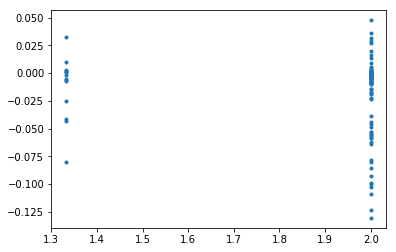

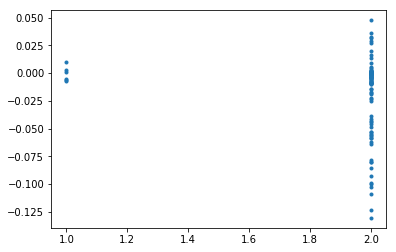

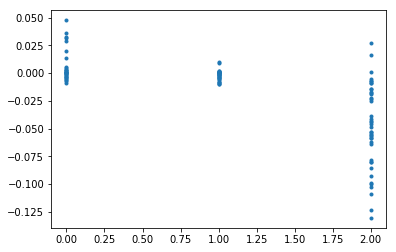

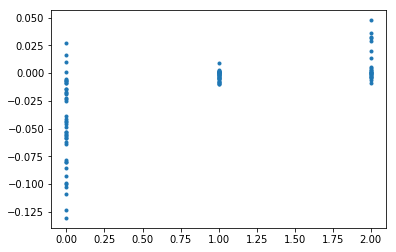

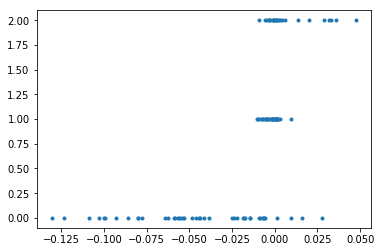

In [11]:
def get_average_improvement(df1, df2):
    ret = []
    for i, j in zip(df1,df2):
        ret.append(np.sum(j) - np.sum(i))
    return ret

improvement = get_average_improvement(bestMSE, bestCOMBO)
np.mean(improvement), np.std(improvement)


fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(target_inD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(target_outD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(descendants,improvement, '.')
plt.show()

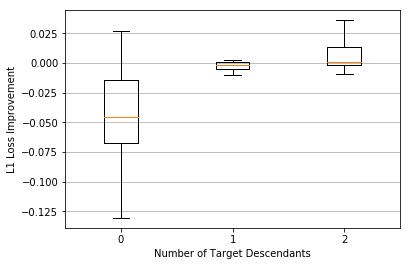

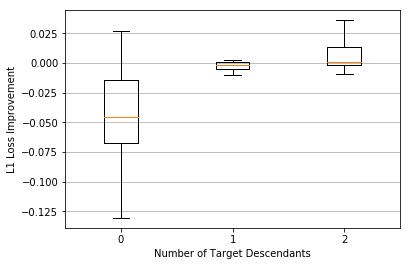

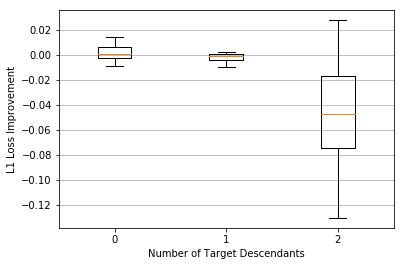

In [35]:
def box_plots(X,Y):
    box = []
    for i in np.unique(X):
        box.append([])
    for x,y in zip(X, Y):
        box[x].append(y)
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.yaxis.grid(True)
    ax.set_xlabel("Number of Target Descendants")
    ax.set_ylabel("L1 Loss Improvement")
    bp = ax.boxplot(box, showfliers=False, labels = ['0', '1', '2'])
    
box_plots(descendants, improvement)
box_plots(target_outD, improvement)
box_plots(target_inD, improvement)

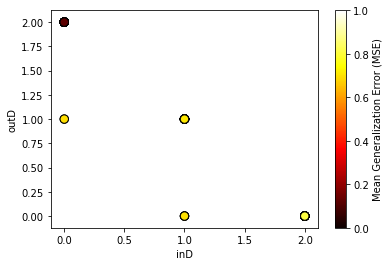

In [45]:
def heat_plot(x,y,z, xlab = 'Mean', ylab = 'Variance', zlab= 'Mean Generalization Error (MSE)', clim_low = 0, clim_high = 1):
    fig, ax = plt.subplots()

    cax = ax.scatter(x, y, c=z, s=70, edgecolor='black', cmap = 'hot')
    cax.set_clim(clim_low, clim_high)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    #plt.colorbar(cax)
    cbar = plt.colorbar(cax)
    cbar.set_label(zlab)
    plt.show()
    

heat_plot(target_outD, target_inD, normalize(improvement), xlab = 'inD', ylab='outD')

In [ ]:
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

In [ ]:
improvement
fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()

improvement
fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()

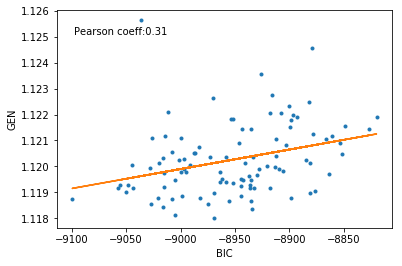

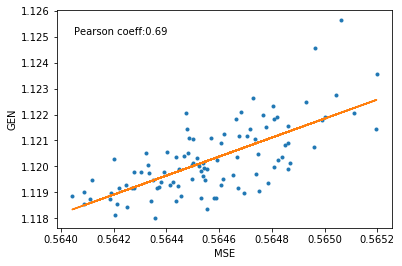

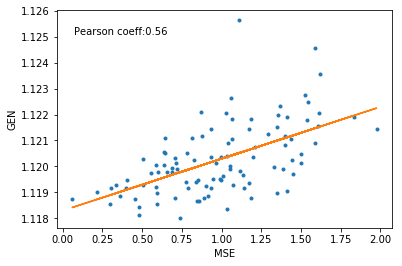

In [11]:
fig, ax = plt.subplots()
b,m = polyfit(proposed,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(proposed,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(proposed,generalization, '.')
plt.plot(proposed, b + m * np.array(proposed), '-')
ax.set_xlabel("BIC")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
b,m = polyfit(metrics,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(metrics,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(metrics,generalization, '.')
plt.plot(metrics, b + m * np.array(metrics), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


total = normalize(metrics) + normalize(proposed)
fig, ax = plt.subplots()
b,m = polyfit(total,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(total,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(total,generalization, '.')
plt.plot(total, b + m * np.array(total), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


In [ ]:
nbest = 10
final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization']))
print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization']))
print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization']))